<a href="https://colab.research.google.com/github/sashakraeva/Blueprint_Budget_Tools/blob/main/Blueprint_Analyzer_Aleksandra_Kraeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blueprint Analyzer

Open_CV exercise based on the Kaggle Tuttorial to meet the assignment for the MRAC01, 2d term, Hardware Course


# 01_Simple Square **Plan**


### 1. Installation & Image Upload

In [ ]:
# Install req libraries
!pip install opencv-python-headless matplotlib

In [ ]:
# Import req libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image
from google.colab import files
uploaded = files.upload()  # Upload your blueprint image


Saving simple_square.png to simple_square (1).png


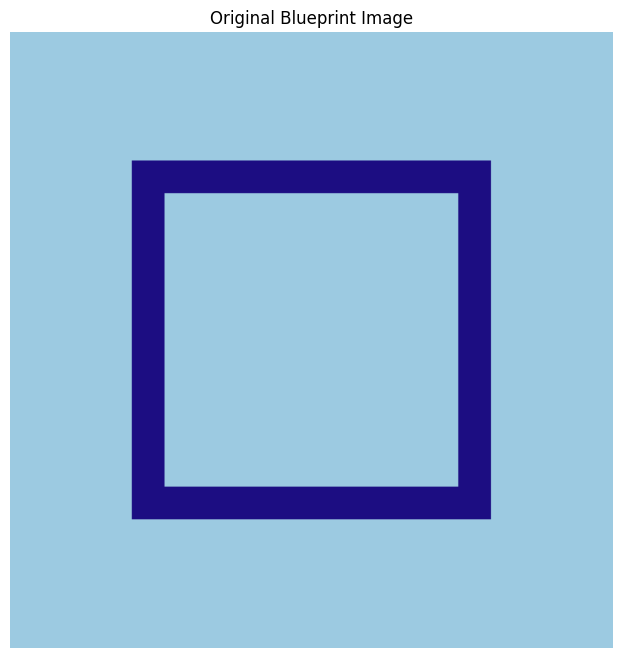

In [ ]:
# To assign name to the uploaded image
blueprint_file = list(uploaded.keys())[0]
blueprint_image = cv2.imread(blueprint_file)

# To display original image
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(blueprint_image, cv2.COLOR_BGR2RGB))
plt.title("Original Blueprint Image")
plt.axis('off')
plt.show()

### 2. Processing Original picture
2.1 Converting to grayscale

---

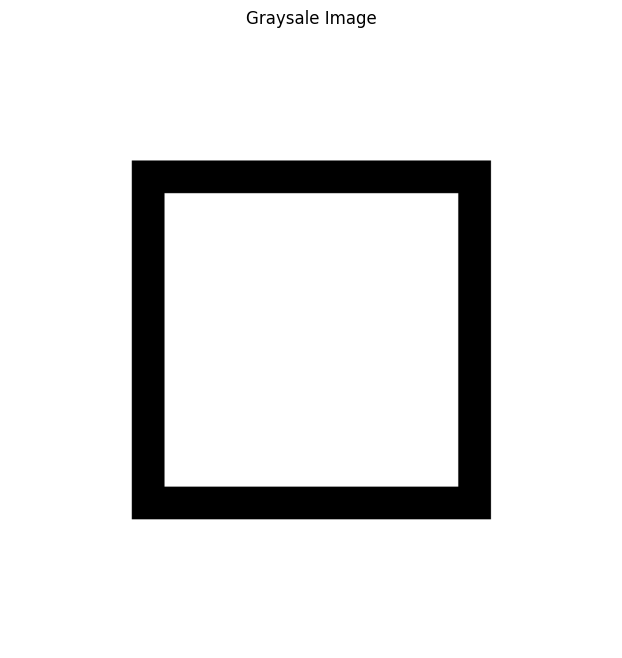

In [ ]:
# Converting the image into grayscale
gray_image = cv2.cvtColor(blueprint_image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 8))
plt.imshow(gray_image, cmap='gray')
plt.title("Graysale Image")
plt.axis('off')
plt.show()

### 2.2 Edge Detection & Cotours

2.2.0 Canny Edge Detection

---

Explanation:

- threshold1 (lower threshold): Minimum gradient magnitude to consider a pixel as part of an edge.
    - Low value: More weak edges are retained, leading to more noise or spurious edges.
    - High value: Fewer weak edges are retained, potentially missing faint edges.
- threshold2 (upper threshold): Maximum gradient magnitude; pixels with gradient above this are definitely edges.
    - Low value: Many edges (strong and weak) are detected, potentially including unwanted noise.
    - High value: Only the strongest edges are retained, which might miss fine details.


! Problem with the code below - it finds 4 contours instead of 2.

What can we do? (see 2.1 Sharr Edge Detection)


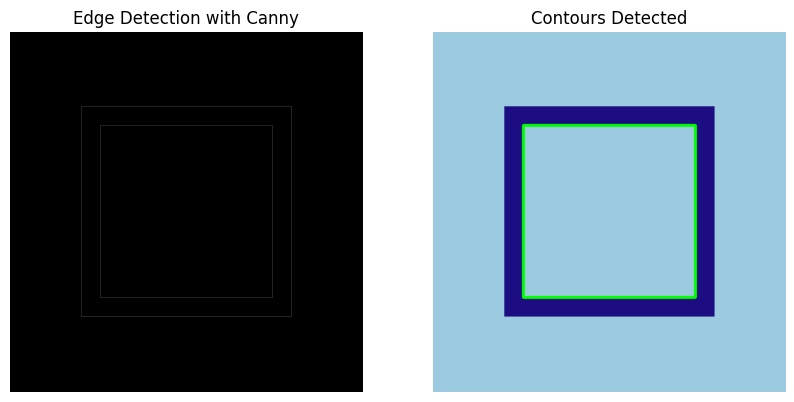

Amount of countors is: 4


In [ ]:
# Edge Detection
canny_edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

# Find contours
canny_contours, _ = cv2.findContours(canny_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Sorting out the countours based on their area in ascending order (from smallest to largest).
canny_cnt = sorted(canny_contours, key=cv2.contourArea)

# Draw contours on a copy of the original image
canny_contour_image = blueprint_image.copy()

# Now there are 4 edges detected
cv2.drawContours(canny_contour_image, canny_cnt[0], -1, (0, 255, 0), 20) # green
# cv2.drawContours(canny_contour_image, canny_cnt[1], -1, (255, 0, 0), 2) # blue
# cv2.drawContours(canny_contour_image, canny_cnt[2], -1, (0, 0, 255), 2) # red
# cv2.drawContours(canny_contour_image, canny_cnt[2], -1, (255, 0, 255), 20) # pink

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(canny_edges, cv2.COLOR_BGR2RGB))
axs[0].set_title("Edge Detection with Canny")
axs[1].imshow(cv2.cvtColor(canny_contour_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Contours Detected")
axs[0].axis('off')
axs[1].axis('off')
plt.show()
print("Amount of countors is: " + str(len(canny_contours)))


2.2.1 Schar Edge Detection

---

! Problem with the code below - it STILL finds 4 contours instead of 2.

What can we do? (see 2.2 Including Treshold)

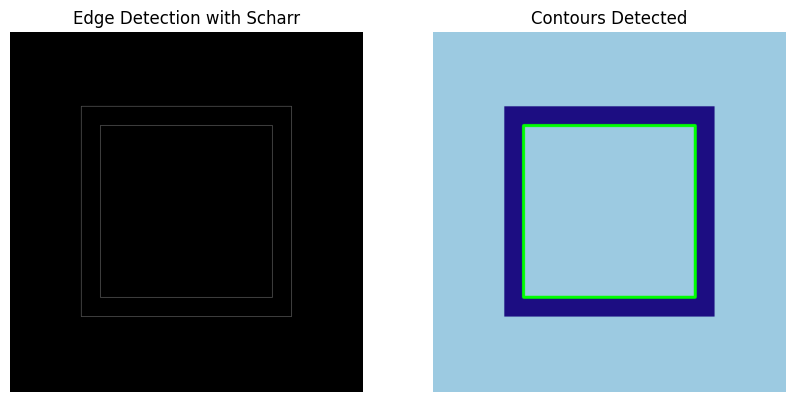

Amount of countors is: 4


In [ ]:
# Computing the gradient using the Scharr operator
sobel_x = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)

# Computing the gradient magnitude
grad_mag = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Normalizing the gradient magnitude to the range [0, 255]
scharr_edges = cv2.normalize(grad_mag, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Find contours
scharr_contours, _ = cv2.findContours(scharr_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Sorting out the countours based on their area in ascending order (from smallest to largest).
scharr_cnt = sorted(scharr_contours, key=cv2.contourArea)

# Draw contours on a copy of the original image
scharr_contour_image = blueprint_image.copy()

# Now there are 4 edges detected
cv2.drawContours(scharr_contour_image, scharr_cnt[0], -1, (0, 255, 0), 20) # green
# cv2.drawContours(scharr_contour_image, scharr_cnt[1], -1, (255, 0, 0), 2) # blue
# cv2.drawContours(scharr_contour_image, scharr_cnt[2], -1, (0, 0, 255), 2) # red
# cv2.drawContours(scharr_contour_image, scharr_cnt[2], -1, (255, 0, 255), 20) # pink

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(scharr_edges, cv2.COLOR_BGR2RGB))
axs[0].set_title("Edge Detection with Scharr")
axs[1].imshow(cv2.cvtColor(scharr_contour_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Contours Detected")
axs[0].axis('off')
axs[1].axis('off')
plt.show()
print("Amount of countors is: " + str(len(scharr_contours)))

2.2.3 Including Threshold - 2 EDGES FINALLY!!

---


What happpened and why?

- Why 4 contours were appearing previously?
  - Canny Edge Detection: This detects all edges in the image, including both the inner and outer edges of the rectangle.
  - Contours Detection: The cv2.findContours function sees each edge separately because it traces boundaries around both the inner and outer edges.
  - Result: Since there are two loops (one for the outer rectangle and one for the inner hollow rectangle) and each loop has two sides (inner and outer edges), the function detects 4 separate contours.


- Why 2 contours?
  - Thresholding was included: Converts the grayscale image into a binary image (black and white). The black areas are treated as the background, and the white areas represent the shape.
  - Here, the entire rectangle (both outer and inner parts) is treated as a single filled shape with two boundaries: outer and inner.
  - Contours Detection: The cv2.findContours function detects only the outer boundary of the shape and the hole inside it.
  - Result:The algorithm detects 2 contours: one for the outer boundary of the rectangle and one for the inner hollow space.


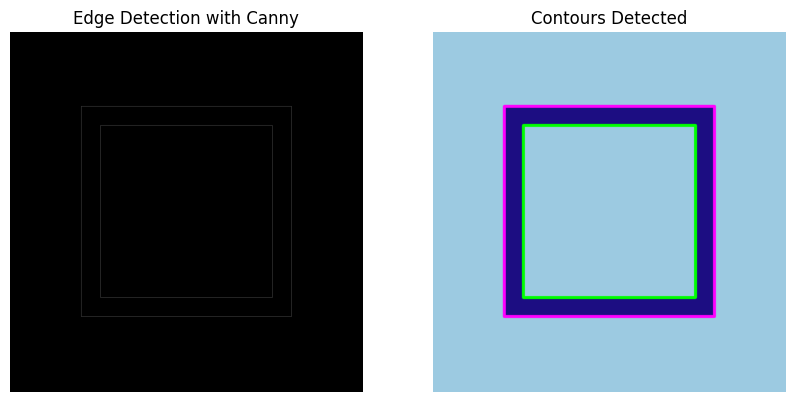

Amount of countors is: 2


In [ ]:
# Edge Detection
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150)

_, threshold = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Sorting out the countours based on their area in ascending order (from smallest to largest).
cnt1 = sorted(contours, key=cv2.contourArea)

# Draw contours on a copy of the original image
contour_image = blueprint_image.copy()

# Now there are 4 edges detected
cv2.drawContours(contour_image, cnt1[0], -1, (0, 255, 0), 20) # green
cv2.drawContours(contour_image, cnt1[1], -1, (255, 0, 255), 20) # pink


fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
axs[0].set_title("Edge Detection with Canny")
axs[1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Contours Detected")
axs[0].axis('off')
axs[1].axis('off')
plt.show()
print("Amount of countors is: " + str(len(contours)))


### 3. Area Calculation
3.1 Pixel per area

In [ ]:
# Calculate the area inside the green contour
green_area = cv2.contourArea(cnt1[0])
print(f"Area inside the green contour: {green_area}")

# Calculate the area inside the pink contour
pink_area = cv2.contourArea(cnt1[1])
print(f"Area inside the pink contour: {pink_area}")

# Calculate the area between the green and pink contours
area_between = pink_area - green_area
print(f"Area between the green and pink contours: {area_between}")


Area inside the green contour: 1464096.5
Area inside the pink contour: 2181528.5
Area between the green and pink contours: 717432.0


3.2 Converting to sq m

In [ ]:
# Pixel-to-meter scale
scale_factor = 0.005  # 1 pixel = 0.005 meters

# Convert green and pink areas from pixels to square meters
green_area_m2 = green_area * (scale_factor ** 2)
pink_area_m2 = pink_area * (scale_factor ** 2)
area_between_m2 = area_between * (scale_factor ** 2)

# Print the results
print(f"Green area in square meters: {green_area_m2:.0f} m²")
print(f"Pink area in square meters: {pink_area_m2:.0f} m²")
print(f"Area between green and pink contours: {area_between_m2:.0f} m²")

Green area in square meters: 37 m²
Pink area in square meters: 55 m²
Area between green and pink contours: 18 m²


3.3 Visualisation of the are on the image

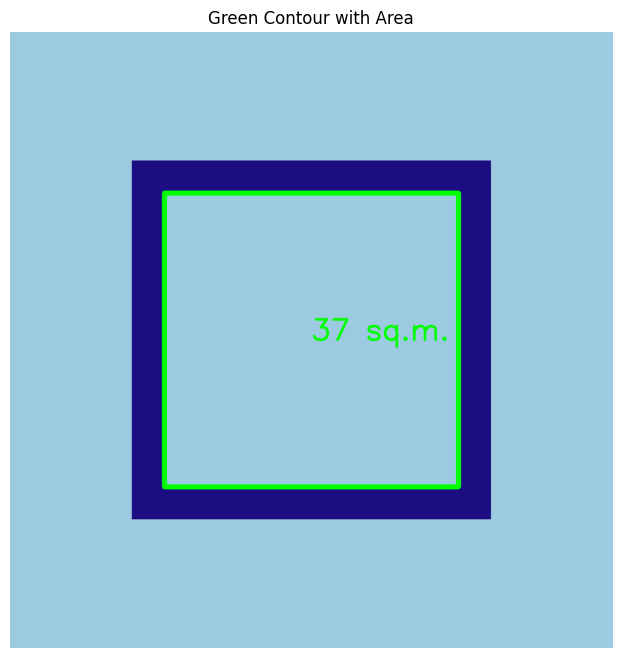

In [ ]:
# Calculate centroids and add text
font = cv2.FONT_HERSHEY_SIMPLEX  # Font for text
font_scale = 4                 # Font size
thickness = 10                    # Thickness of text

# Draw green contour on a copy of the original image
green_contour_image = blueprint_image.copy()

# Now there are 4 edges detected
cv2.drawContours(green_contour_image, cnt1[0], -1, (0, 255, 0), 20) # green

# Green contour
M = cv2.moments(cnt1[0])
if M['m00'] != 0:  # Check if the contour has a valid area
    cx_green = int(M['m10'] / M['m00'])
    cy_green = int(M['m01'] / M['m00'])
    green_text = f"{green_area_m2:.0f} sq.m."
    cv2.putText(green_contour_image, green_text, (cx_green, cy_green), font, font_scale, (0, 255, 0), thickness)
else:
    print("Idk the area")

# Display the annotated image
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(green_contour_image, cv2.COLOR_BGR2RGB))
plt.title("Green Contour with Area")
plt.axis('off')
plt.show()


# 02_Apartment Plan

1. Area Calculation an Visualisation

In [ ]:
# Load the image
from google.colab import files
uploaded1 = files.upload()  # Upload your blueprint image

Saving four_squares.png to four_squares (1).png


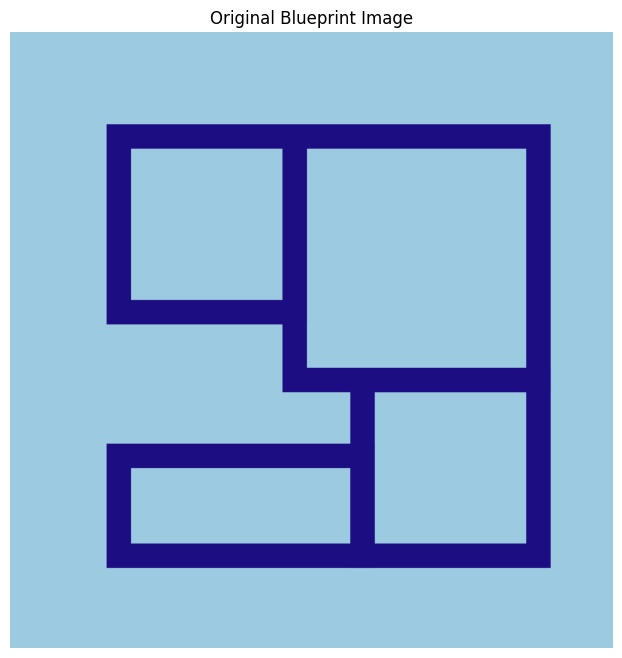

In [ ]:
# To assign name to the uploaded image
blueprint_file1 = list(uploaded1.keys())[0]
blueprint_image1 = cv2.imread(blueprint_file1)

# To display original image
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(blueprint_image1, cv2.COLOR_BGR2RGB))
plt.title("Original Blueprint Image")
plt.axis('off')
plt.show()

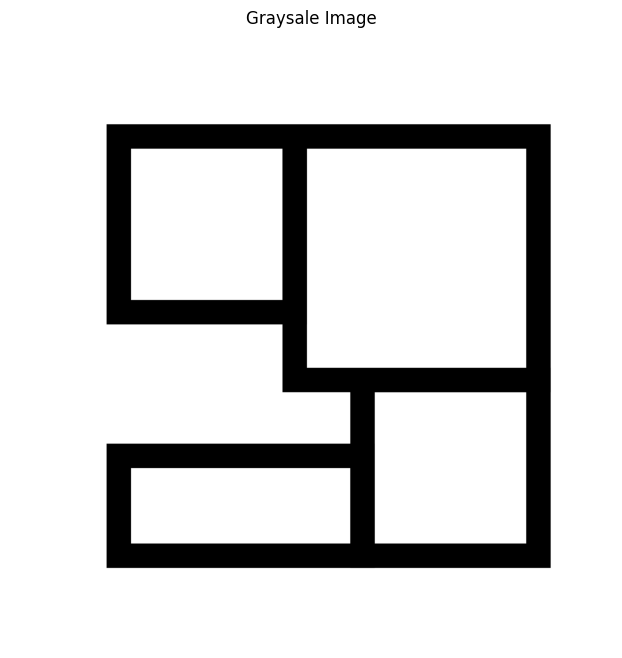

In [ ]:
# Converting the image into grayscale
gray_image1 = cv2.cvtColor(blueprint_image1, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 8))
plt.imshow(gray_image1, cmap='gray')
plt.title("Graysale Image")
plt.axis('off')
plt.show()

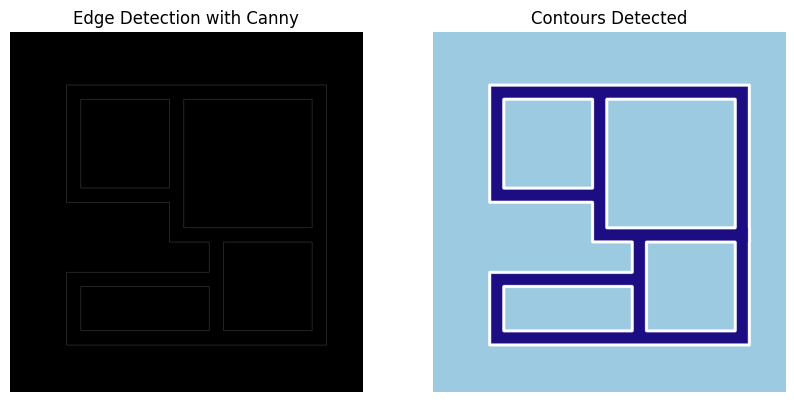

Amount of countors is: 5


In [ ]:
# Edge Detection
edges1 = cv2.Canny(gray_image1, threshold1=50, threshold2=150)

_, threshold1 = cv2.threshold(gray_image1, 100, 255, cv2.THRESH_BINARY_INV)

contours1, hierarchy1 = cv2.findContours(threshold1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Sorting out the countours based on their area in ascending order (from smallest to largest).
cnt01 = sorted(contours1, key=cv2.contourArea)

# Draw contours on a copy of the original image
contour_image1 = blueprint_image1.copy()

# Now there are 4 edges detected
cv2.drawContours(contour_image1, cnt01, -1, (255, 255, 255), 20) # white
# cv2.drawContours(contour_image1, cnt01[0], -1, (0, 255, 0), 20) # green
#cv2.drawContours(contour_image1, cnt01[1], -1, (255, 0, 255), 20) # pink
# cv2.drawContours(contour_image1, cnt01[2], -1, (0, 0, 255), 20) # red
# cv2.drawContours(contour_image1, cnt01[3], -1, (255, 210, 255), 20) # lightpink
# cv2.drawContours(contour_image1, cnt01[4], -1, (255, 55, 10), 20) # blue


fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(cv2.cvtColor(edges1, cv2.COLOR_BGR2RGB))
axs[0].set_title("Edge Detection with Canny")
axs[1].imshow(cv2.cvtColor(contour_image1, cv2.COLOR_BGR2RGB))
axs[1].set_title("Contours Detected")
axs[0].axis('off')
axs[1].axis('off')
plt.show()
print("Amount of countors is: " + str(len(contours1)))


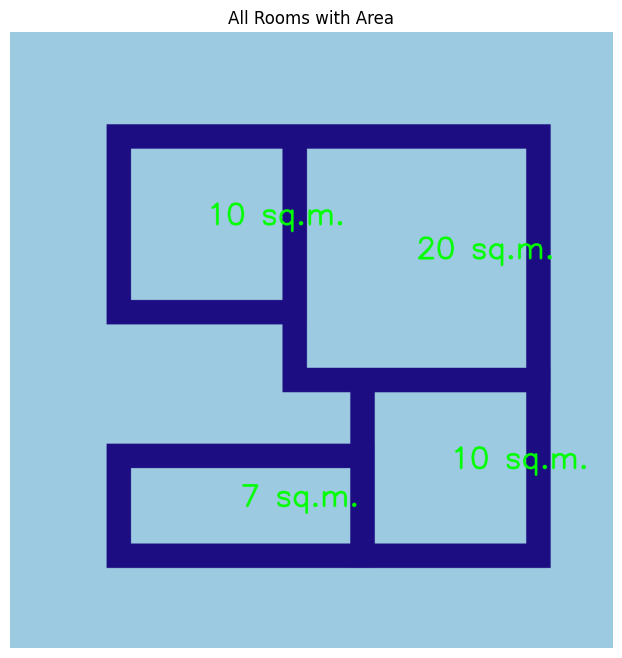

In [ ]:
# scale_factor = 0.005  from before
# Font properties from before



# Create a copy of the original image to draw areas
room_area_image = blueprint_image1.copy()

# Calculate and print the area for each contour except the last one
for i, contour in enumerate(cnt01[:-1]):  # Exclude the last contour
    area = cv2.contourArea(contour) # pixels
    area_m2 = area * (scale_factor ** 2) #sq. m.
    # print(f"Contour {i + 1} Area: {area_m2:.0f} sq.m.")

    # Calculate the centroid of the contour (to write area text in each room)
    M = cv2.moments(contour)
    if M['m00'] != 0:  # Avoid division by zero
        cx = int(M['m10'] / M['m00'])  # X-coordinate of centroid
        cy = int(M['m01'] / M['m00'])  # Y-coordinate of centroid

        text = f"{area_m2:.0f} sq.m."
        cv2.putText(room_area_image, text, (cx, cy), font, font_scale, (0, 255, 0), thickness)


plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(room_area_image, cv2.COLOR_BGR2RGB))
plt.title("All Rooms with Area")
plt.axis('off')
plt.show()


2. Iteractive room selection and area detection

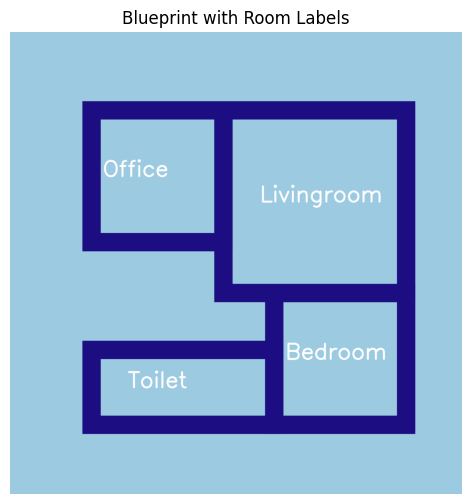

In [ ]:

# Create a copy of the original image to draw areas and room labels
room_area_image = blueprint_image1.copy()

# Room labels for each contour
room_labels = ["Toilet", "Bedroom", "Office", "Livingroom"]

# Dictionary to store room names and areas
room_areas = {}

# Calculate and label each room's area on the image
for i, contour in enumerate(cnt01[:-1]):
    area = cv2.contourArea(contour)
    area_m2 = area * (scale_factor ** 2)

    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M['m00'] != 0:  # Avoid division by zero
        cx = int(M['m10'] / M['m00'])  # X-coordinate of centroid
        cy = int(M['m01'] / M['m00'])  # Y-coordinate of centroid

        # Get the room label
        room_label = room_labels[i]
        room_areas[room_label] = area_m2  # Store the room name and area in the dictionary

        # Add the room label and area text at the centroid
        text = f"{room_label}"
        cv2.putText(room_area_image, text, (cx - 300, cy), font, font_scale, (255, 255, 255), thickness)

# Display the blueprint image with room labels
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(room_area_image, cv2.COLOR_BGR2RGB))
plt.title("Blueprint with Room Labels")
plt.axis('off')
plt.show()

# Interactive input to select a room
room_name = input("Enter the name of the room you're interested in (e.g., Bedroom, Toilet): ").strip()

# Print the area of the selected room
if room_name in room_areas:
    print(f"The area of {room_name} is {room_areas[room_name]:.2f} sq.m.")
else:
    print(f"Room '{room_name}' not found. Please check the input.")
